In [1]:
import numpy as np
import pandas as pd

In [2]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
merged_data = transactions.merge(customers, on='CustomerID', how='left')

In [4]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


In [5]:
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'TransactionID': 'count',
    'Region': lambda x: x.mode()[0]
}).reset_index()

In [6]:
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(customer_features.drop('CustomerID', axis=1))

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
clustering_results = {}

#K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(features_scaled)
clustering_results['KMeans'] = kmeans_labels

kmeans_db_index = davies_bouldin_score(features_scaled, kmeans_labels)
print(f"K-Means Davies-Bouldin Index: {kmeans_db_index}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


K-Means Davies-Bouldin Index: 0.9862851051792104


In [10]:
#DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(features_scaled)
clustering_results['DBSCAN'] = dbscan_labels

dbscan_db_index = davies_bouldin_score(features_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1]) if len(set(dbscan_labels)) > 1 else None
print(f"DBSCAN Davies-Bouldin Index: {dbscan_db_index}")

DBSCAN Davies-Bouldin Index: 1.325763488246026


In [11]:
#Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=4)
agglomerative_labels = agglomerative.fit_predict(features_scaled)
clustering_results['Agglomerative'] = agglomerative_labels

agg_db_index = davies_bouldin_score(features_scaled, agglomerative_labels)
print(f"Agglomerative Clustering Davies-Bouldin Index: {agg_db_index}")

Agglomerative Clustering Davies-Bouldin Index: 1.0067180151191164


In [12]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features_scaled)

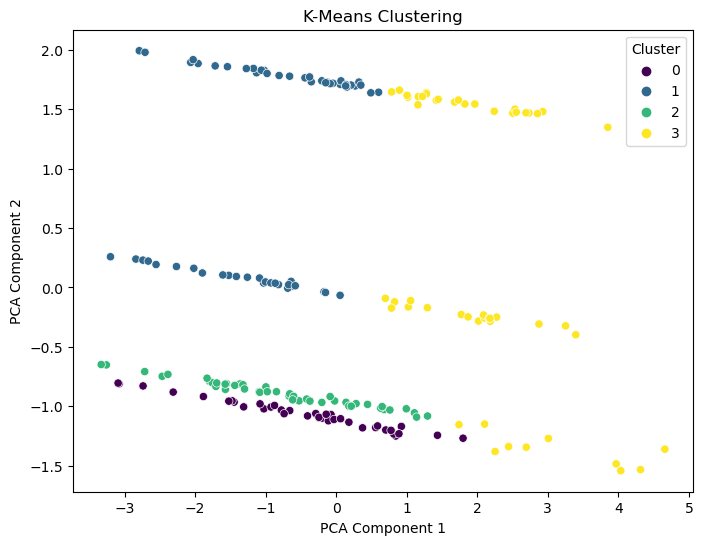

In [13]:
# Plot K-Means Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=kmeans_labels, palette='viridis')
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

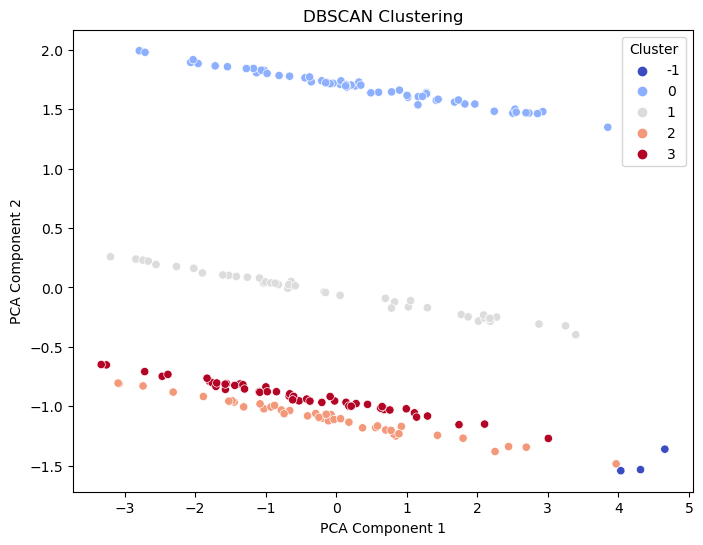

In [14]:
# Plot DBSCAN Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=dbscan_labels, palette='coolwarm')
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

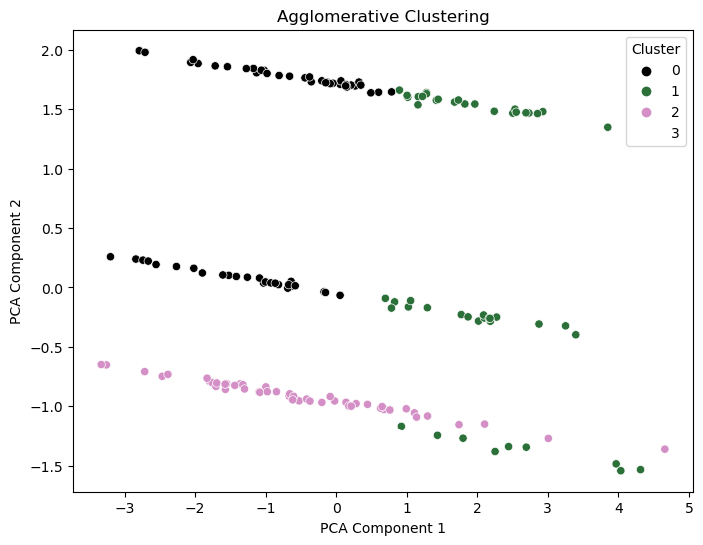

In [15]:
# Plot Agglomerative Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=agglomerative_labels, palette='cubehelix')
plt.title("Agglomerative Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()